# Content List

## 1. Import libraries

## 2. Import data

## 3. Wrangling data
### 3.1 Create pivot tables
### 3.2 Join tables
### 3.3 Check for missing values

## 4. Feature selection

## 5. The Elbow Technique

## 6. K-means clustering

## 7. Visualizations

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # For standarizing features
from sklearn.decomposition import PCA
import pylab as pl

# 2. Import data

In [2]:
# Create path to folder project 

path = r'C:\Users\adrig\OneDrive\Documentos\CAREERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 6\Internet use in EU'
path

'C:\\Users\\adrig\\OneDrive\\Documentos\\CAREERFOUNDRY\\DATA IMMERSION\\ACHIEVEMENT 6\\Internet use in EU'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'internet_use_act_pp_gdp_act_group_flag.csv'), index_col = 0)

In [4]:
df.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group
0,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,Internet banking,66.65,40200.0,E-commerce and Services
1,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,civic or political participation,21.21,40200.0,Civic
2,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,sending/receiving e-mails,72.86,40200.0,Personal Communication
3,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,finding information about goods and services,66.88,40200.0,Information and Research
4,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,job search or sending an application,14.11,40200.0,Work and Professional Use


In [5]:
df.shape

(1006934, 9)

# 3. Wrangling data

## 3.1 Create pivot tables
To separate frequency of internet access in columns
To separate internet activites in columns

In [6]:
# Pivot table for frequency of internet access 
df_freq = df.pivot_table(index = 'demographic_group', columns = 'freq_internet_access', values ='internet_access_rate', aggfunc='mean')

In [7]:
df_freq.shape

(72, 5)

In [8]:
df_freq.head()

freq_internet_access,at least once a month,at least once a week (but not every day),daily,less than once a month,less than once a week
demographic_group,,,,,
All individuals,3.335563,9.218699,62.240054,0.918881,2.730681
Employees,4.999499,15.792716,77.926346,1.413351,6.359749
Employees working full time,NaN,NaN,90.490952,NaN,NaN
Employees working part time,NaN,NaN,85.797885,NaN,NaN
Females 35 to 44 years old,NaN,3.861393,91.033613,NaN,0.810468


In [9]:
# Pivot table for internet activities
df_act = df.pivot_table(index ='demographic_group', columns = 'internet_activities', values ='internet_activities_rate', aggfunc='mean')

In [10]:
df_act.shape

(72, 25)

In [11]:
df_act.head()

internet_activities,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),creating websites or blogs,doing an online course (of any subject),downloading software,finding information about goods and services,job search or sending an application,...,"playing/downloading games, images, films or music",posting messages to social media sites or instant messaging,reading/downloading online newspapers/news,selling goods or services,sending/receiving e-mails,"sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",telephoning or video calls,travel and accommodation services,uploading self-created content to any website to be shared,watching internet streamed TV or videos
demographic_group,,,,,,,,,,,,,,,,,,,,,
All individuals,41.729966,26.791500,17.144768,10.192350,40.327018,6.336807,8.498368,19.542416,56.975090,14.048084,...,26.421320,34.49407,34.84819,12.568751,59.857464,38.065143,42.170899,31.211724,24.966879,64.838422
Employees,45.944097,33.324043,21.372704,NaN,NaN,NaN,17.552522,16.882800,60.762965,13.219581,...,20.167311,NaN,29.82423,13.115704,62.809315,NaN,70.638130,30.267218,NaN,76.126452
Employees working full time,70.922620,32.050488,20.540000,NaN,NaN,NaN,17.675969,NaN,81.641834,16.144821,...,NaN,NaN,NaN,23.295459,83.067424,NaN,69.513057,NaN,NaN,75.735214
Employees working part time,65.028950,30.527403,20.188616,NaN,NaN,NaN,16.433763,NaN,75.906530,20.483084,...,NaN,NaN,NaN,22.374932,77.634110,NaN,65.418402,NaN,NaN,70.991786
Females 35 to 44 years old,66.375295,35.531400,21.088115,13.268571,NaN,NaN,17.581113,NaN,79.956474,19.259142,...,NaN,NaN,NaN,23.655006,80.829505,46.234000,73.344340,44.631495,40.016607,74.757134


In [12]:
df_freq.dtypes

freq_internet_access
at least once a month                       float64
at least once a week (but not every day)    float64
daily                                       float64
less than once a month                      float64
less than once a week                       float64
dtype: object

In [13]:
df_act.dtypes

internet_activities
Internet banking                                                                                                                   float64
accessing personal health records online                                                                                           float64
civic or political participation                                                                                                   float64
communicating with instructors or students using educational websites/portals                                                      float64
consulting wikis (to obtain knowledge on any subject)                                                                              float64
creating websites or blogs                                                                                                         float64
doing an online course (of any subject)                                                                                            float64
downloa

## 3.2 Join tables

In [14]:
frames = [df_freq, df_act]
df_total = pd.concat(frames, axis=1)

In [15]:
df_total.shape

(72, 30)

In [16]:
df_total.head()

,at least once a month,at least once a week (but not every day),daily,less than once a month,less than once a week,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),...,"playing/downloading games, images, films or music",posting messages to social media sites or instant messaging,reading/downloading online newspapers/news,selling goods or services,sending/receiving e-mails,"sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",telephoning or video calls,travel and accommodation services,uploading self-created content to any website to be shared,watching internet streamed TV or videos
demographic_group,,,,,,,,,,,,,,,,,,,,,
All individuals,3.335563,9.218699,62.240054,0.918881,2.730681,41.729966,26.791500,17.144768,10.192350,40.327018,...,26.421320,34.49407,34.84819,12.568751,59.857464,38.065143,42.170899,31.211724,24.966879,64.838422
Employees,4.999499,15.792716,77.926346,1.413351,6.359749,45.944097,33.324043,21.372704,NaN,NaN,...,20.167311,NaN,29.82423,13.115704,62.809315,NaN,70.638130,30.267218,NaN,76.126452
Employees working full time,NaN,NaN,90.490952,NaN,NaN,70.922620,32.050488,20.540000,NaN,NaN,...,NaN,NaN,NaN,23.295459,83.067424,NaN,69.513057,NaN,NaN,75.735214
Employees working part time,NaN,NaN,85.797885,NaN,NaN,65.028950,30.527403,20.188616,NaN,NaN,...,NaN,NaN,NaN,22.374932,77.634110,NaN,65.418402,NaN,NaN,70.991786
Females 35 to 44 years old,NaN,3.861393,91.033613,NaN,0.810468,66.375295,35.531400,21.088115,13.268571,NaN,...,NaN,NaN,NaN,23.655006,80.829505,46.234000,73.344340,44.631495,40.016607,74.757134


## 3.3 Check for missing values

In [17]:
df_total.isnull().sum()

at least once a month                                                                                                              36
at least once a week (but not every day)                                                                                           21
daily                                                                                                                               0
less than once a month                                                                                                             36
less than once a week                                                                                                              22
Internet banking                                                                                                                    0
accessing personal health records online                                                                                            3
civic or political participation                              

In [18]:
df_total = df_total.fillna(0)

In [19]:
df_total.isnull().sum()

at least once a month                                                                                                              0
at least once a week (but not every day)                                                                                           0
daily                                                                                                                              0
less than once a month                                                                                                             0
less than once a week                                                                                                              0
Internet banking                                                                                                                   0
accessing personal health records online                                                                                           0
civic or political participation                                     

# 4. Feature selection

Due to the large number of variables (30) I performed a feature selection using an automated method based on the correlation coefficient. HIghly correlated features may contain redundant information, which can lead to multicollinearity. Therefore, one of the correlated features was removed to reduce redundancy and improve clusters interpretation.   

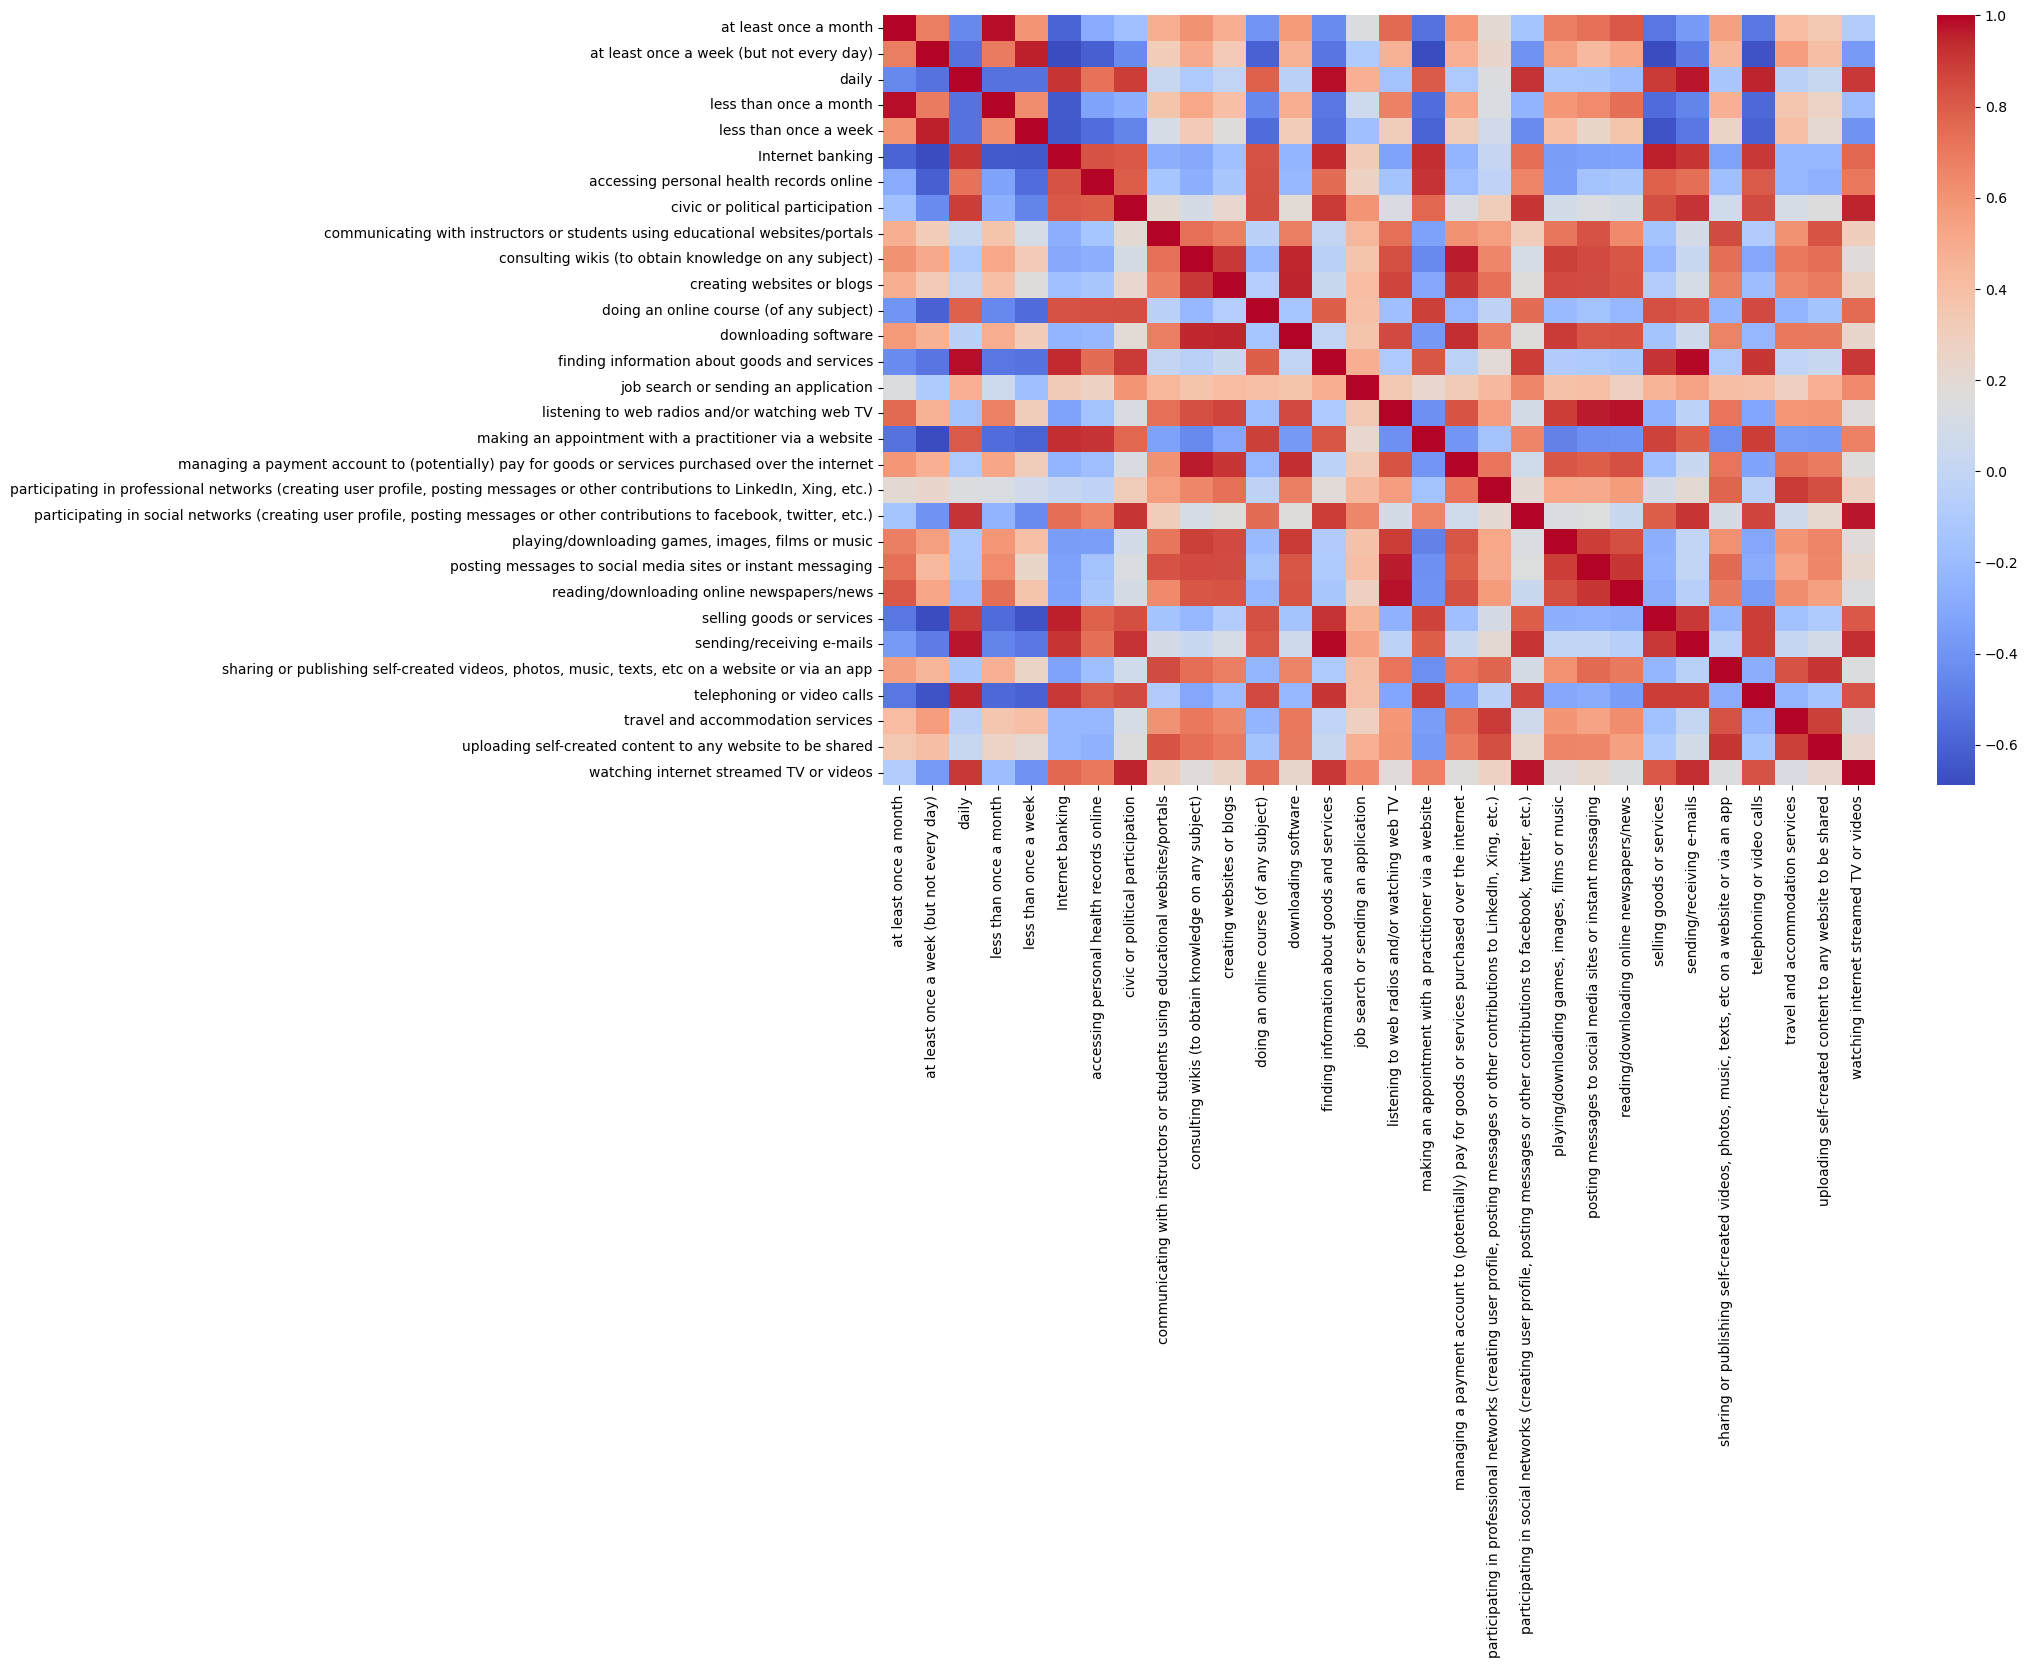

In [20]:
# Correlation matrix
corr_matrix = df_total.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [21]:
# Select the upper triangular matrix

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper_tri.max())

at least once a month                                                                                                                   NaN
at least once a week (but not every day)                                                                                           0.688501
daily                                                                                                                             -0.450048
less than once a month                                                                                                             0.985291
less than once a week                                                                                                              0.955509
Internet banking                                                                                                                   0.912337
accessing personal health records online                                                                                           0.833310
civic or political p

In [22]:
# create a list with columns with high corelation coefficient 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['less than once a month', 'less than once a week', 'finding information about goods and services', 'managing a payment account to (potentially) pay for goods or services purchased over the internet', 'posting messages to social media sites or instant messaging', 'reading/downloading online newspapers/news', 'selling goods or services', 'sending/receiving e-mails', 'telephoning or video calls', 'watching internet streamed TV or videos']


In [23]:
# drop the columns with a high correlation coeficient
df_total_r = df_total.drop(columns=to_drop, axis=1) 

In [24]:
df_total_r.shape

(72, 20)

In [25]:
df_total_r.head()

,at least once a month,at least once a week (but not every day),daily,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),creating websites or blogs,doing an online course (of any subject),downloading software,job search or sending an application,listening to web radios and/or watching web TV,making an appointment with a practitioner via a website,"participating in professional networks (creating user profile, posting messages or other contributions to LinkedIn, Xing, etc.)","participating in social networks (creating user profile, posting messages or other contributions to facebook, twitter, etc.)","playing/downloading games, images, films or music","sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",travel and accommodation services,uploading self-created content to any website to be shared
demographic_group,,,,,,,,,,,,,,,,,,,,
All individuals,3.335563,9.218699,62.240054,41.729966,26.791500,17.144768,10.192350,40.327018,6.336807,8.498368,19.542416,14.048084,21.055508,17.916757,9.746748,58.637121,26.421320,38.065143,31.211724,24.966879
Employees,4.999499,15.792716,77.926346,45.944097,33.324043,21.372704,0.000000,0.000000,0.000000,17.552522,16.882800,13.219581,14.055865,30.599470,0.000000,74.738582,20.167311,0.000000,30.267218,0.000000
Employees working full time,0.000000,0.000000,90.490952,70.922620,32.050488,20.540000,0.000000,0.000000,0.000000,17.675969,0.000000,16.144821,0.000000,29.691282,0.000000,73.836140,0.000000,0.000000,0.000000,0.000000
Employees working part time,0.000000,0.000000,85.797885,65.028950,30.527403,20.188616,0.000000,0.000000,0.000000,16.433763,0.000000,20.483084,0.000000,28.751429,0.000000,69.982156,0.000000,0.000000,0.000000,0.000000
Females 35 to 44 years old,0.000000,3.861393,91.033613,66.375295,35.531400,21.088115,13.268571,0.000000,0.000000,17.581113,0.000000,19.259142,0.000000,34.096187,14.314860,79.185302,0.000000,46.234000,44.631495,40.016607


# 5. The Elbow Technique

In [29]:
num_cl = range(1,10) # range of potential clusters in the data
kmeans =[KMeans(n_clusters=i) for i in num_cl] # defines kmeans clusters in the range assigned above

In [30]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_total_r).score(df_total_r) for i in range (len(kmeans))]
score

C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[-298215.9492343938,
 -177735.27638439593,
 -120421.57796314485,
 -86861.02655360074,
 -69377.63561072577,
 -59294.12883873695,
 -51259.3456718028,
 -46248.061792487904,
 -39887.266101695015]

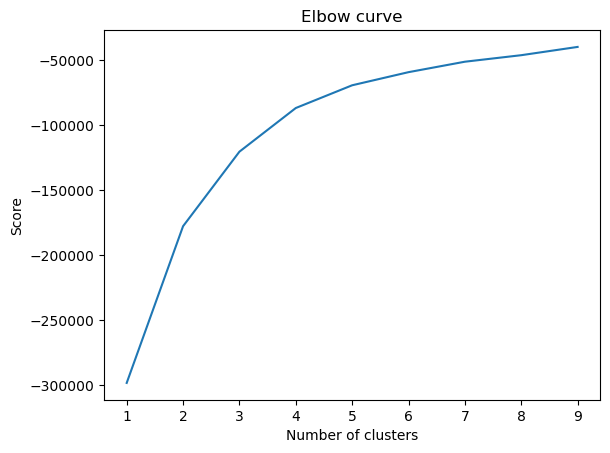

In [31]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

In three the curve starts to straighten out, but it is until 5 that the straighten is more dramatic, so I will try with 4 clusters. 

# 6. K-means clustering

In [32]:
# Create the k-means object
kmeans = KMeans(n_clusters=4)

In [33]:
# Fit the k-means object to the data
kmeans.fit(df_total_r)

C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
df_total_r['clusters'] = kmeans.fit_predict(df_total_r)

C:\Users\adrig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
df_total_r.head()

,at least once a month,at least once a week (but not every day),daily,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),creating websites or blogs,doing an online course (of any subject),...,job search or sending an application,listening to web radios and/or watching web TV,making an appointment with a practitioner via a website,"participating in professional networks (creating user profile, posting messages or other contributions to LinkedIn, Xing, etc.)","participating in social networks (creating user profile, posting messages or other contributions to facebook, twitter, etc.)","playing/downloading games, images, films or music","sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",travel and accommodation services,uploading self-created content to any website to be shared,clusters
demographic_group,,,,,,,,,,,,,,,,,,,,,
All individuals,3.335563,9.218699,62.240054,41.729966,26.791500,17.144768,10.192350,40.327018,6.336807,8.498368,...,14.048084,21.055508,17.916757,9.746748,58.637121,26.421320,38.065143,31.211724,24.966879,2
Employees,4.999499,15.792716,77.926346,45.944097,33.324043,21.372704,0.000000,0.000000,0.000000,17.552522,...,13.219581,14.055865,30.599470,0.000000,74.738582,20.167311,0.000000,30.267218,0.000000,0
Employees working full time,0.000000,0.000000,90.490952,70.922620,32.050488,20.540000,0.000000,0.000000,0.000000,17.675969,...,16.144821,0.000000,29.691282,0.000000,73.836140,0.000000,0.000000,0.000000,0.000000,3
Employees working part time,0.000000,0.000000,85.797885,65.028950,30.527403,20.188616,0.000000,0.000000,0.000000,16.433763,...,20.483084,0.000000,28.751429,0.000000,69.982156,0.000000,0.000000,0.000000,0.000000,3
Females 35 to 44 years old,0.000000,3.861393,91.033613,66.375295,35.531400,21.088115,13.268571,0.000000,0.000000,17.581113,...,19.259142,0.000000,34.096187,14.314860,79.185302,0.000000,46.234000,44.631495,40.016607,0


In [36]:
df_total_r['clusters'].value_counts()

clusters
2    26
3    21
1    15
0    10
Name: count, dtype: int64

In [37]:
df_total_r.head()

,at least once a month,at least once a week (but not every day),daily,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),creating websites or blogs,doing an online course (of any subject),...,job search or sending an application,listening to web radios and/or watching web TV,making an appointment with a practitioner via a website,"participating in professional networks (creating user profile, posting messages or other contributions to LinkedIn, Xing, etc.)","participating in social networks (creating user profile, posting messages or other contributions to facebook, twitter, etc.)","playing/downloading games, images, films or music","sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",travel and accommodation services,uploading self-created content to any website to be shared,clusters
demographic_group,,,,,,,,,,,,,,,,,,,,,
All individuals,3.335563,9.218699,62.240054,41.729966,26.791500,17.144768,10.192350,40.327018,6.336807,8.498368,...,14.048084,21.055508,17.916757,9.746748,58.637121,26.421320,38.065143,31.211724,24.966879,2
Employees,4.999499,15.792716,77.926346,45.944097,33.324043,21.372704,0.000000,0.000000,0.000000,17.552522,...,13.219581,14.055865,30.599470,0.000000,74.738582,20.167311,0.000000,30.267218,0.000000,0
Employees working full time,0.000000,0.000000,90.490952,70.922620,32.050488,20.540000,0.000000,0.000000,0.000000,17.675969,...,16.144821,0.000000,29.691282,0.000000,73.836140,0.000000,0.000000,0.000000,0.000000,3
Employees working part time,0.000000,0.000000,85.797885,65.028950,30.527403,20.188616,0.000000,0.000000,0.000000,16.433763,...,20.483084,0.000000,28.751429,0.000000,69.982156,0.000000,0.000000,0.000000,0.000000,3
Females 35 to 44 years old,0.000000,3.861393,91.033613,66.375295,35.531400,21.088115,13.268571,0.000000,0.000000,17.581113,...,19.259142,0.000000,34.096187,14.314860,79.185302,0.000000,46.234000,44.631495,40.016607,0


# 7. Visualizations

In [38]:
df_total_r.columns

Index(['at least once a month', 'at least once a week (but not every day)',
       'daily', 'Internet banking', 'accessing personal health records online',
       'civic or political participation',
       'communicating with instructors or students using educational websites/portals',
       'consulting wikis (to obtain knowledge on any subject)',
       'creating websites or blogs', 'doing an online course (of any subject)',
       'downloading software', 'job search or sending an application',
       'listening to web radios and/or watching web TV',
       'making an appointment with a practitioner via a website',
       'participating in professional networks (creating user profile, posting messages or other contributions to LinkedIn, Xing, etc.)',
       'participating in social networks (creating user profile, posting messages or other contributions to facebook, twitter, etc.)',
       'playing/downloading games, images, films or music',
       'sharing or publishing self-created

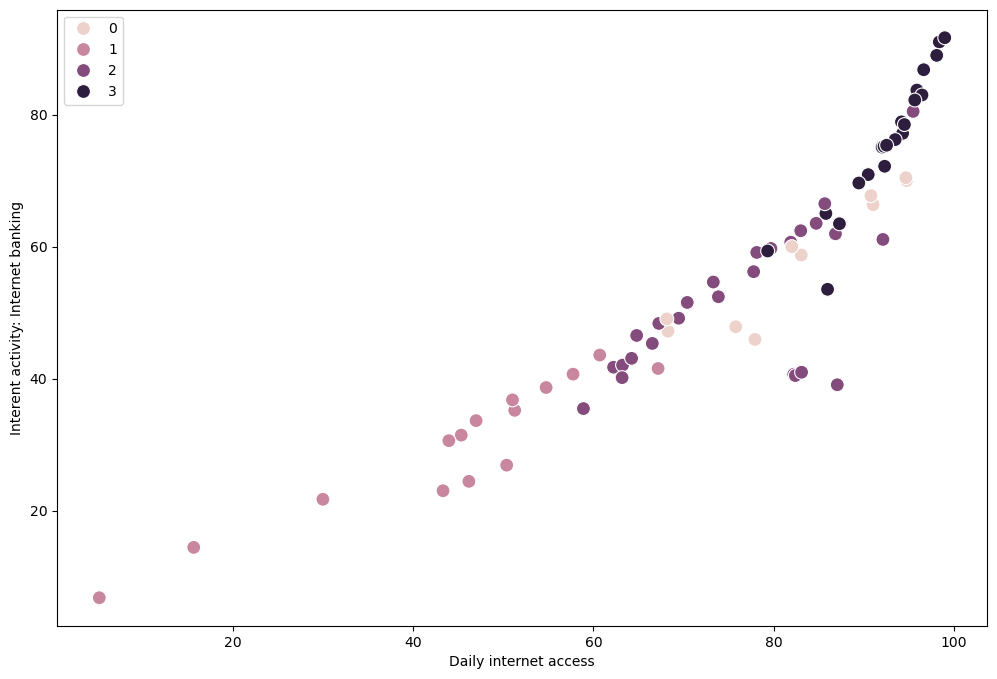

In [39]:
# Plot the clusters for 'Daily frequency' and 'travel and accomodation services'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_total['daily'], y=df_total['Internet banking'], hue=kmeans.labels_, s=100)
# Here you#re subsetting X for the x and y arguments to avoud using their labels
# hue takes the value of the attribute 'kmeans_labels_', which is the result of running the k-means algorithm.
# s represents the size of the points you want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('Daily internet access')
plt.ylabel('Interent activity: Internet banking')
plt.show()

### Comments:
The scatterplot a positive correlation between the two variables. It is interesting how three of the clusters are concentrated in the mid to high range for both variables, while one remains in the low to mid range, suggesting that a segmentof the population is less digitally engaged. 

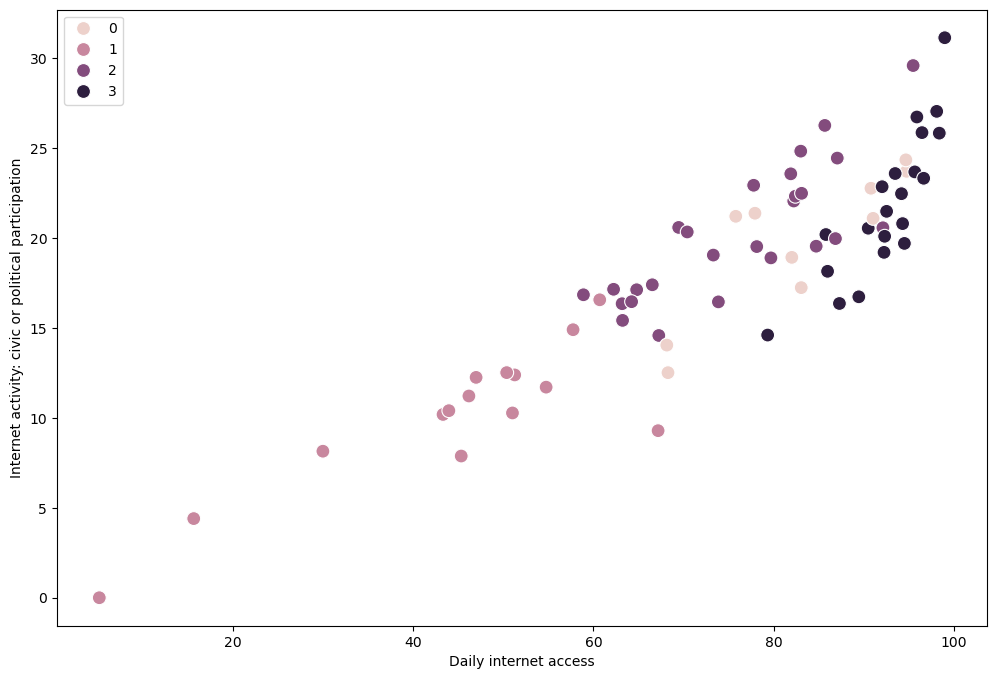

In [40]:
# Plot the clusters for 'Daily frequency' and 'travel and accomodation services'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_total['daily'], y=df_total['civic or political participation'], hue=kmeans.labels_, s=100)
# Here you#re subsetting X for the x and y arguments to avoud using their labels
# hue takes the value of the attribute 'kmeans_labels_', which is the result of running the k-means algorithm.
# s represents the size of the points you want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('Daily internet access')
plt.ylabel('Internet activity: civic or political participation')
plt.show()

### Comments:
This scatterplot also shows a positive correlation, whti the same pattern as the last one, but more scattered in the three mid-high range clusters. 

In [41]:
# Create color flags for clusters
df_total_r.loc[df_total_r['clusters'] == 3, 'cluster_color'] = 'dark purple'
df_total_r.loc[df_total_r['clusters'] == 2, 'cluster_color'] = 'purple'
df_total_r.loc[df_total_r['clusters'] == 1, 'cluster_color'] = 'pink'
df_total_r.loc[df_total_r['clusters'] == 0, 'cluster_color'] = 'light pink'

In [42]:
df_total_r.head()

,at least once a month,at least once a week (but not every day),daily,Internet banking,accessing personal health records online,civic or political participation,communicating with instructors or students using educational websites/portals,consulting wikis (to obtain knowledge on any subject),creating websites or blogs,doing an online course (of any subject),...,listening to web radios and/or watching web TV,making an appointment with a practitioner via a website,"participating in professional networks (creating user profile, posting messages or other contributions to LinkedIn, Xing, etc.)","participating in social networks (creating user profile, posting messages or other contributions to facebook, twitter, etc.)","playing/downloading games, images, films or music","sharing or publishing self-created videos, photos, music, texts, etc on a website or via an app",travel and accommodation services,uploading self-created content to any website to be shared,clusters,cluster_color
demographic_group,,,,,,,,,,,,,,,,,,,,,
All individuals,3.335563,9.218699,62.240054,41.729966,26.791500,17.144768,10.192350,40.327018,6.336807,8.498368,...,21.055508,17.916757,9.746748,58.637121,26.421320,38.065143,31.211724,24.966879,2,purple
Employees,4.999499,15.792716,77.926346,45.944097,33.324043,21.372704,0.000000,0.000000,0.000000,17.552522,...,14.055865,30.599470,0.000000,74.738582,20.167311,0.000000,30.267218,0.000000,0,light pink
Employees working full time,0.000000,0.000000,90.490952,70.922620,32.050488,20.540000,0.000000,0.000000,0.000000,17.675969,...,0.000000,29.691282,0.000000,73.836140,0.000000,0.000000,0.000000,0.000000,3,dark purple
Employees working part time,0.000000,0.000000,85.797885,65.028950,30.527403,20.188616,0.000000,0.000000,0.000000,16.433763,...,0.000000,28.751429,0.000000,69.982156,0.000000,0.000000,0.000000,0.000000,3,dark purple
Females 35 to 44 years old,0.000000,3.861393,91.033613,66.375295,35.531400,21.088115,13.268571,0.000000,0.000000,17.581113,...,0.000000,34.096187,14.314860,79.185302,0.000000,46.234000,44.631495,40.016607,0,light pink


In [43]:
# Show all columns
pd.set_option('display.max_columns', None)

In [44]:
# Show all the table
pd.set_option('display.width', None)

In [45]:
df_total_r.groupby('cluster_color').agg(['mean', 'median']).round(2)

at least once a month         \
                               mean median   
cluster_color                                
dark purple                    0.00   0.00   
light pink                     0.88   0.00   
pink                           2.13   2.72   
purple                         2.75   3.34   

              at least once a week (but not every day)         daily         \
                                                  mean median   mean median   
cluster_color                                                                 
dark purple                                       0.00   0.00  92.57  93.48   
light pink                                        7.05   6.25  82.65  82.54   
pink                                              9.51   8.72  44.65  46.99   
purple                                            8.28   8.39  76.06  77.95   

              Internet banking         \
                          mean median   
cluster_color                           
dark purple              76.10  76.23   
light pink               58.34  59.37   
pink                     29.95  31.44   
purple                   51.67  50.35   

              accessing personal health records online         \
                                                  mean median   
cluster_color                                                   
dark purple                                      39.11  37.59   
light pink                                       29.80  29.32   
pink                                             15.67  15.90   
purple                                           27.29  26.95   

              civic or political participation         \
                                          mean median   
cluster_color                                           
dark purple                              21.92  21.48   
light pink                               19.72  21.15   
pink                                     10.14  10.40   
purple                                   20.18  19.75   

              communicating with instructors or students using educational websites/portals  \
                                                                                       mean   
cluster_color                                                                                 
dark purple                                                 0.00                              
light pink                                                  7.17                              
pink                                                        4.86                              
purple                                                     13.96                              

                     consulting wikis (to obtain knowledge on any subject)  \
              median                                                  mean   
cluster_color                                                                
dark purple     0.00                                               0.00      
light pink      7.53                                               0.00      
pink            3.41                                              21.21      
purple         10.39                                              51.49      

                     creating websites or blogs         \
              median                       mean median   
cluster_color                                            
dark purple     0.00                       0.00   0.00   
light pink      0.00                       0.00   0.00   
pink           24.68                       2.88   2.83   
purple         47.42                       8.93   7.12   

              doing an online course (of any subject)         \
                                                 mean median   
cluster_color                                                  
dark purple                                     20.59  18.86   
light pink                                      14.88  15.34   
pink                                             4.76

### Comments on frequency of internet access across clsuters:
- The light pink cluster has the highest average of daily internet access and zero usage in lower frequency categories. This suggests a highly digitalized group with consistent connectivity.
- In contrast, the dark purple cluster, shows the lowest daily internet access average and higher usage in the weekly category, indicating a less digitalized population.
- The purple cluster has the second highest average for daily internet access but still shows some presence in lower frequency categories.
- The pink is present across all frequency categories, with its highest values in the daily frequency, suggesting a more varied usage pattern. 

In [46]:
# Separate dataframes in mean and media
df_means = df_total_r.groupby('cluster_color').mean(numeric_only=True)
df_means = df_means.drop(columns=['clusters', 'at least once a month', 'at least once a week (but not every day)']) # the last two columns were droppedd
# as they represent very small percentage of population, I consider the "daily" frequency to be the most interesting for the analysis. 

C:\Users\adrig\AppData\Local\Temp\ipykernel_44400\959139878.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


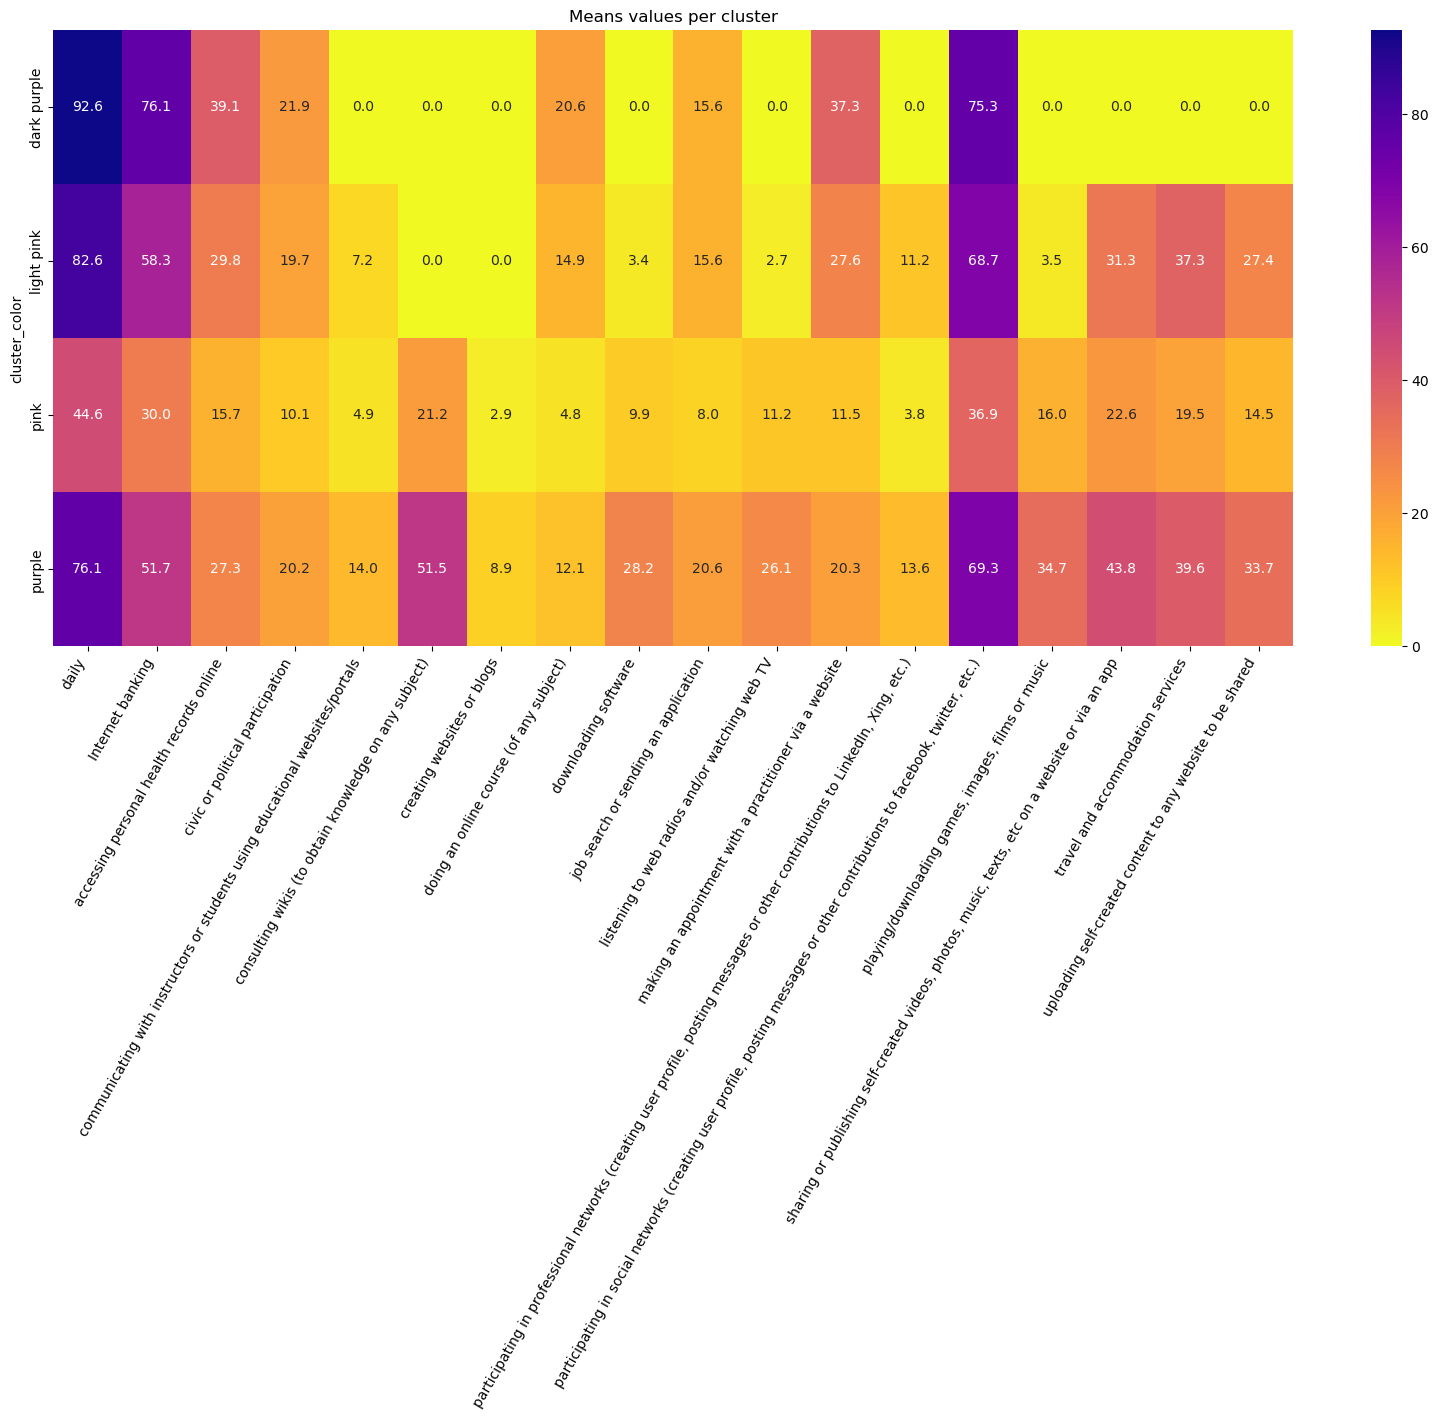

In [47]:
# Create a heatmap to visualize better the means for all activities 
plt.figure(figsize=(20,8))
sns.heatmap(df_means, annot=True, fmt='.1f', cmap='plasma_r')
plt.title('Means values per cluster')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Insights:
#### Dark purple cluster:
- Highest rate in daily internet access (over 90%).
- High usage of internet banking and social networks.
- Moderate usage of internet for health-related activities. 
-  Low usage in civic participation, educational activities and job searching.
-  Zero or close to zero use of internet for all the other activities. 
This suggests a highly connected group that uses the internet for practical and everyday purposes, but less engaged in civic, educational or content-creation activities online. Their online use is for utilitarian purposes rathen than participatory ones. 
#### light pink cluster:
- Has the second highest rate in daily internet access.
- High usage of internet for social networking. 
- Moderate to high rate in internet banking and moderate use in sharing or publishing content, travel and accomodation services.
- Low rates in health-related activities, civic participation, job searching, participating in professional networks, educational purposes.
This suggests a group that used the internet mainly for social interaction and entertainment. They are less involved in professional, civic or educational activites online. 
#### purple cluster:
- The third highest daily access rate.
- Most diverse activity profile, with many activities showing moderate usage (34-66%).
- High rates in asocial networking. 
- Moderate rates in internet banking, consulting wikis, sharing content, playing or downloading games or music, travel and accomodation services.
- Lower usage in health-related activities, civic participation, educational purposes, downloading software, professional networking, lsitening to web radio or watching TV, creating websites or blogs.
- This group presents the most diverse activity profile among all clusters. Their online behavior shows a wide range of activities. This suggests a more digital lifestyle that has different purposes: etertainment, practical tasks, information seeking, social connection. 
#### pink cluster:
- Lowest rate of daily internet access and no activities with high rates (over 66%)
- Highest rate (34.3%) in social networking, flowwoed by internet banking, sharing content, consulting wikis.
- Lowest rates (less than 20%) in travel and accomodation services, downloading content, health-related activities.  
- This suggests a less digitally engaged group whose internet usage is mainly oriented in communication and entertainment. 

#### Next Steps:
With these results, it would be interesting to analyze which demographic groups correspond to each cluster and conduct a more detailed analysis not only be age, but also by educational level, employment status and gender. This would allow to generate more focused insights that could help identify behavioral patterns and develop inclusion srategies depending on the specific needs and habits of each group.  
Additionally, analyzing the population by country could show relevant regional differences and provide a better understanding of digital patterns across countries.  